In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db=mysql.connector.connect(host="localhost", 
                          username="root",
                          password="Nilesh@#3112",
                          database="ecommerce")

cur=db.cursor()


### List all unique cities where customers are located

In [3]:
query="""select distinct customer_city from customers"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


### count the number of orders placed in 2017

In [5]:
query="""select count(order_id) from orders where year(order_purchase_timestamp)=2017 """

cur.execute(query)
data=cur.fetchall()
"total orders placed in 2017 are", data[0][0]

('total orders placed in 2017 are', 90202)

### find the total sales per category

In [7]:
query="""select products.product_category category,  
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data=cur.fetchall()
df = pd.DataFrame(data,  columns = ["category", "sales"] )
df

,category,sales
0,perfumery,1013477.32
1,Furniture Decoration,2860352.78
2,telephony,973764.10
3,bed table bath,3425107.34
4,automotive,1704588.66
...,...,...
69,cds music dvds,2398.86
70,La Cuisine,5827.06
71,Fashion Children's Clothing,1571.34
72,PC Gamer,4348.86


### Calculate percentage of orders that were paid in inatallments

In [9]:
query= """ select (sum(case when payment_installments >= 1 then 1
else 0 end))/count(*)*100 from payments
"""
cur.execute(query)
data=cur.fetchall()
"The percentage of orders that were paid in installments",  data[0][0]

('The percentage of orders that were paid in installments', Decimal('99.9981'))

### count the number of customers from each state.

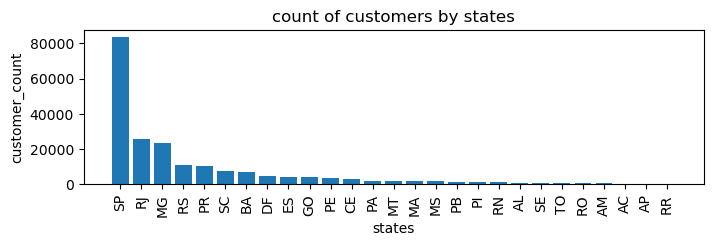

In [11]:
 query = """ Select customer_state, count(customer_id)
 from customers group  by customer_state
 """

cur.execute(query)
data=cur.fetchall()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
df=pd.DataFrame(data, columns = ["state", "customer_count"])
df=df.sort_values(by = "customer_count", ascending = False)
plt.figure(figsize =(8, 2))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation=90)
plt.xlabel('states')
plt.ylabel('customer_count')
plt.title('count of customers by states')
plt.show()

### Calculate the number of orders per month in 2018 

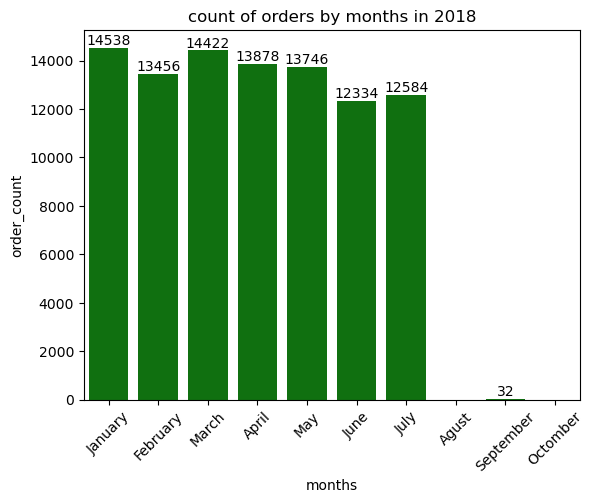

In [13]:
query =""" select  monthname(order_purchase_timestamp) months, count(order_id)
from orders where year(order_purchase_timestamp) = 2018
group by months 
"""

cur.execute (query)

data=cur.fetchall()
df=pd.DataFrame(data, columns=["months", "order_count"])
o=["January","February","March","April","May","June","July","Agust","September","Octomber"]
ax= sns.barplot(x = df["months"], y = df["order_count"], data = df, order = o, color ='green')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title('count of orders by months in 2018')
plt.show()

### Find the average number of products per order, grouped by customer city.


In [15]:

query = """with count_per_order as
 (select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)
 
 select customers.customer_city, round(avg(count_per_order.oc), 2) average_orders
 from customers join count_per_order
 on customers.customer_id = count_per_order.customer_id
 group by customers.customer_city order by average_orders
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer city", "average products/order"])
df.head(10)

,customer city,average products/order
0,joselandia,2.00
1,sonora,2.00
2,porteiras,2.00
3,silvanopolis,2.00
4,itabi,2.00
5,salmourao,2.00
6,cha de alegria,2.00
7,cerro grande,2.00
8,barras,2.00
9,francisco santos,2.00


### calculate the percentage of total revenue contributed by each product category.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db=mysql.connector.connect(host="localhost", 
                          username="root",
                          password="Nilesh@#3112",
                          database="ecommerce")

cur=db.cursor()


query =""" select upper(products.product_category) category,  
round((sum(payments.payment_value)/ (select sum(payment_value) from payments))*100, 2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc; """

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data,columns = ["category", "percentage distribution"])
df

,category,percentage distribution
0,BED TABLE BATH,21.40
1,HEALTH BEAUTY,20.71
2,COMPUTER ACCESSORIES,19.81
3,FURNITURE DECORATION,17.87
4,WATCHES PRESENT,17.86
...,...,...
69,PC GAMER,0.03
70,HOUSE COMFORT 2,0.02
71,CDS MUSIC DVDS,0.01
72,FASHION CHILDREN'S CLOTHING,0.01


### Identify the correlation between product price and the number of times a product has been purchased 

In [19]:
import numpy as np

query="""select products.product_category,
 count(order_items.product_id),
 round(avg(order_items.price),2)
 from products join order_items
 on products.product_id = order_items.product_id
 group by products.product_category; 
 """

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns = ["category", "order_count", "price"])
df

arr1 = df["order_count"]
arr2 = df["price"]
a=np.corrcoef([arr1, arr2])
print("the correlation between price and number of times a product has benn purchased is", a[0][-1])


the correlation between price and number of times a product has benn purchased is -0.10631514167157562


### calculate the total revenue generated by each seller, and rank them by revenue

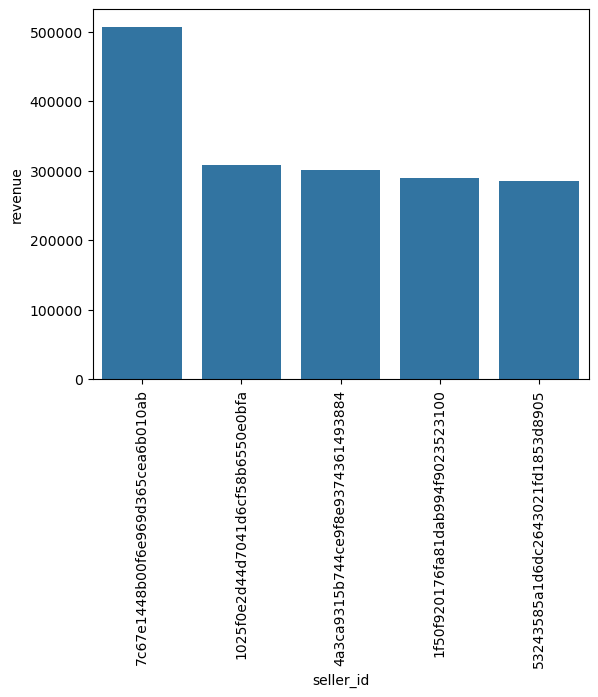

In [21]:
query=""" select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns = ["seller_id","revenue","rank"])
df=df.head()
sns.barplot(x = "seller_id", y="revenue", data = df)
plt.xticks( rotation = 90)

plt.show()

### calculate the moving average of order values for each customer over their order history.

In [23]:
query="""select customer_id, order_purchase_timestamp,payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a;
"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
3,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
4,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
...,...,...,...,...
207767,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
207768,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
207769,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
207770,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


### calculate the cumulative sales per month for each year.

In [25]:
query ="""select years, months, payment, sum(payment)
over(order by years, months) cumulative_sales from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2)as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a;
"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,504.48,504.48
1,2016,10,118180.96,118685.44
2,2016,12,39.24,118724.68
3,2017,1,276976.08,395700.76
4,2017,2,583816.02,979516.78
5,2017,3,899727.20,1879243.98
6,2017,4,835576.06,2714820.04
7,2017,5,1185837.64,3900657.68
8,2017,6,1022552.76,4923210.44
9,2017,7,1184765.84,6107976.28


### calculate the year-over-year growth rate of total sales

In [27]:
query= """ with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2)as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years,(( payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years )) * 100 from a
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns = ["years", "year % growth"])
df

,years,year % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


### defined the retention rate of customers , defined as the percentage of customers who make anther purchase within 6 months of their first purchase.

In [29]:
query= """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),
b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id)

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id))
from a left join b
on a.customer_id = b.customer_id ;
"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

,0
0,None


### Identify the top 3 customers who spent the most money in each year


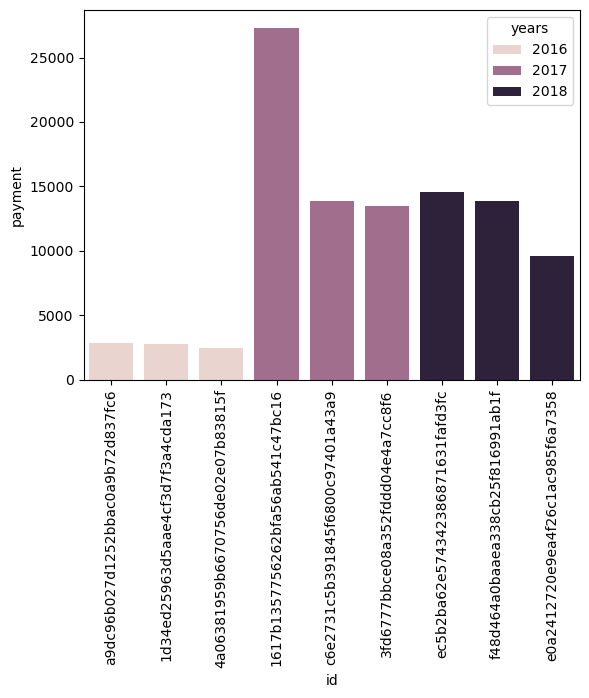

In [31]:
query= """  select years, customer_id, payment, d_rank
from 
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over (partition by year(orders.order_purchase_timestamp)
 order by sum(payments.payment_value)desc) d_rank   
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id)as a
where d_rank <= 3 ;
""" 

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["years", "id","payment","rank"])
sns.barplot(x = "id",  y="payment", data = df, hue = "years")
plt.xticks(rotation=90)
plt.show()